In [8]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("/mnt/waterchallenge/MainData/00_all_ClimateIndices_and_precip.csv")
df.index = pd.to_datetime(df['date'])

<AxesSubplot: xlabel='date'>

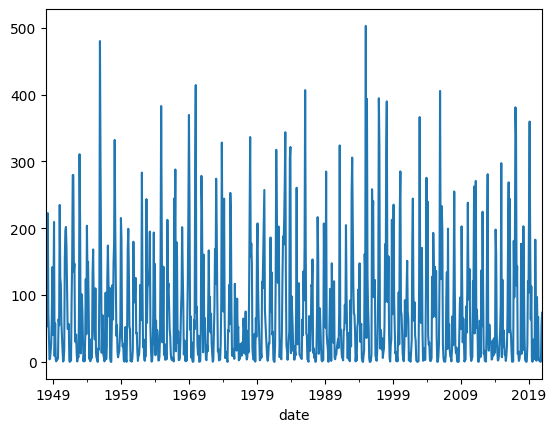

In [10]:
rainfall = df['precipitation']
rainfall.plot()

In [11]:
# Every 5 months try to predict the next month
# [[[1], [2], [3], [4], [5]]] [6] (jan feb march april may) (predict june)
# [[[2], [3], [4], [5], [6]]] [7] (feb march april may june) (predict july)
# etc...

# X is the 3d tensor (matrix), y is the prediction
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [12]:
# Split into sliding windows of WINDOW_SIZE samples with the WINDOW_SIZE + 1 as the label
WINDOW_SIZE = 5
X, y = df_to_X_y(rainfall, WINDOW_SIZE)
X.shape, y.shape

((871, 5, 1), (871,))

In [13]:
# Split into training, values, and testing
X_train1, y_train1 = X[:700], y[:700]
X_val1, y_val1 = X[700:788], y[700:788]
X_test1, y_test1 = X[788:], y[788:]

X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((700, 5, 1), (700,), (88, 5, 1), (88,), (83, 5, 1), (83,))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Create first model

model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Save best model
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [16]:
# Fit the model (only save model if validation loss is small)
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp])

Epoch 1/10
13/22 [================>.............] - ETA: 0s - loss: 13328.0693 - root_mean_squared_error: 115.4473

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 8s 260ms/step - loss: 13461.9346 - root_mean_squared_error: 116.0256 - val_loss: 8976.1562 - val_root_mean_squared_error: 94.7426
Epoch 2/10
16/22 [====================>.........] - ETA: 0s - loss: 13250.9453 - root_mean_squared_error: 115.1127

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 4s 206ms/step - loss: 13445.4268 - root_mean_squared_error: 115.9544 - val_loss: 8961.2695 - val_root_mean_squared_error: 94.6640
Epoch 3/10
16/22 [====================>.........] - ETA: 0s - loss: 13359.8633 - root_mean_squared_error: 115.5849

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 5s 223ms/step - loss: 13425.7061 - root_mean_squared_error: 115.8693 - val_loss: 8943.7939 - val_root_mean_squared_error: 94.5716
Epoch 4/10
16/22 [====================>.........] - ETA: 0s - loss: 13171.7666 - root_mean_squared_error: 114.7683

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 4s 199ms/step - loss: 13402.6787 - root_mean_squared_error: 115.7699 - val_loss: 8923.4395 - val_root_mean_squared_error: 94.4640
Epoch 5/10
14/22 [==================>...........] - ETA: 0s - loss: 13964.7129 - root_mean_squared_error: 118.1724

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 5s 218ms/step - loss: 13374.2119 - root_mean_squared_error: 115.6469 - val_loss: 8894.7812 - val_root_mean_squared_error: 94.3121
Epoch 6/10
16/22 [====================>.........] - ETA: 0s - loss: 13836.2021 - root_mean_squared_error: 117.6274

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 5s 217ms/step - loss: 13334.4453 - root_mean_squared_error: 115.4749 - val_loss: 8857.9932 - val_root_mean_squared_error: 94.1169
Epoch 7/10
11/22 [==============>...............] - ETA: 0s - loss: 11559.9570 - root_mean_squared_error: 107.5172

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 4s 195ms/step - loss: 13284.0947 - root_mean_squared_error: 115.2566 - val_loss: 8809.9873 - val_root_mean_squared_error: 93.8615
Epoch 8/10
13/22 [================>.............] - ETA: 0s - loss: 13206.2773 - root_mean_squared_error: 114.9186

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 5s 234ms/step - loss: 13216.7227 - root_mean_squared_error: 114.9640 - val_loss: 8750.0732 - val_root_mean_squared_error: 93.5418
Epoch 9/10
15/22 [===================>..........] - ETA: 0s - loss: 12579.1592 - root_mean_squared_error: 112.1569

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 4s 203ms/step - loss: 13142.2676 - root_mean_squared_error: 114.6397 - val_loss: 8686.3057 - val_root_mean_squared_error: 93.2004
Epoch 10/10
13/22 [================>.............] - ETA: 0s - loss: 13541.1865 - root_mean_squared_error: 116.3666

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 5s 232ms/step - loss: 13062.5254 - root_mean_squared_error: 114.2914 - val_loss: 8614.4131 - val_root_mean_squared_error: 92.8139


In [17]:
# Load model from disk
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [18]:
# Quickly plot and show prediction vs actual data
def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mse(y, predictions)

In [19]:
plot_predictions1(model1, X_train1, y_train1)
plot_predictions1(model1, X_test1, y_test1)

22/22 [==============================] - 0s 2ms/step


NameError: name 'plt' is not defined

Bad pipe message: %s [b'\x13\x8cXf\x82l4\x8f\xa4\x88j3J\xc0\x9ff>\xeb y\xbad\xb2s\xa2\xd0s\x00\xfd\x02$\x96\xb6\xa7']
Bad pipe message: %s [b'\x00\x03\xe1L\xf0z6\xaa-E\xa8\xa5Z\xe7\x8b\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02']
Bad pipe message: %s [b'\xdc\xafH\xfbO\x9a=Rn\xd0t\xbeH^MV\xae\xab \x17\xdf\xb0\x14V\xd9\xee\xefS\xd5\x0e\x0c@\x19\x87\x1f\xb3\xe5BvU\xd1r)$\xc6<=hU\xba\x86\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n']
Bad pipe message: %s [b'\x8c\xc3\xee\xa4\xcc\x98\xe2<"yN\xc6r\xc8R\xb6\xbd\xef\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0', b"$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1